# Skeleton

This skeleton should give you a good starting point.
We load the train and test data and write the submission file needed for Kaggle.
So, you can fully concentrate on data analysis and creating models.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

# Prepare data

First, we will load and transform our data. The transformation could be anything from splitting the data, encoding features (OneHotEncoding), adding new features, or basic feature engineering. In this skeleton, we only split the data into the train set (X_train, y_train) and validation set (X_val, y_val).

Note, we don't have to create a test set first here, because the test set was already created by us and is in "houses_test.csv" (without the prices).

In [2]:
# Load the train data
train_data = pd.read_csv('../data/houses_train.csv', index_col=0)

In [4]:
# remove wrong years 
year_mask = (train_data['build_year'] > 1500) & (train_data['build_year'] < 2023)
filtered_train_data = train_data[year_mask]

# remove 0 rooms
room_zero_mask = (filtered_train_data['num_rooms'] > 0)
filtered_train_data = filtered_train_data[room_zero_mask]


In [ ]:
# temp data analysis block - playground

# temp_column = 'num_rooms'
# temp_mask = filtered_train_data[temp_column] > 20
# temp_filtered = filtered_train_data[temp_mask]
# temp_filtered.describe()
# # sns.histplot(data=temp_filtered[temp_column])

,lat,long,zipcode,build_year,living_area,num_rooms,water_percentage_1000,travel_time_private_transport,travel_time_public_transport,number_of_buildings_in_hectare,number_of_apartments_in_hectare,number_of_workplaces_in_hectare,number_of_workplaces_sector_1_in_hectare,number_of_workplaces_sector_2_in_hectare,number_of_workplaces_sector_3_in_hectare,population_in_hectare,price
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,1.000000e+01
mean,47.121888,8.669255,6669.10000,1980.600000,174.500000,45.150000,0.033783,45.800000,75.800000,7.300000,23.400000,4.500000,0.300000,1.800000,3.600000,32.40000,9.940000e+05
std,0.433258,0.765603,1992.98238,25.751807,132.324727,12.297357,0.084144,19.887461,33.449132,2.406011,22.436082,4.275252,0.948683,1.549193,4.195235,19.51182,5.344301e+05
min,46.154034,7.462321,3297.00000,1936.000000,95.000000,26.000000,0.000000,12.000000,15.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,10.00000,2.950000e+05
25%,46.877000,8.244236,5898.00000,1964.000000,110.000000,35.000000,0.000000,35.000000,58.750000,5.500000,8.500000,3.000000,0.000000,0.000000,3.000000,14.00000,6.675000e+05
50%,47.219683,8.689672,6517.00000,1984.500000,136.500000,45.250000,0.003973,45.000000,70.500000,7.500000,15.500000,3.000000,0.000000,3.000000,3.000000,31.00000,8.650000e+05
75%,47.448936,9.267339,8198.00000,2001.750000,164.500000,55.000000,0.020430,58.000000,95.000000,8.750000,30.250000,4.750000,0.000000,3.000000,3.000000,47.50000,1.392500e+06
max,47.554123,9.629689,9430.00000,2012.000000,540.000000,65.000000,0.271731,81.000000,134.000000,11.000000,78.000000,16.000000,3.000000,3.000000,15.000000,60.00000,1.995000e+06


<Axes: xlabel='num_rooms', ylabel='living_area'>

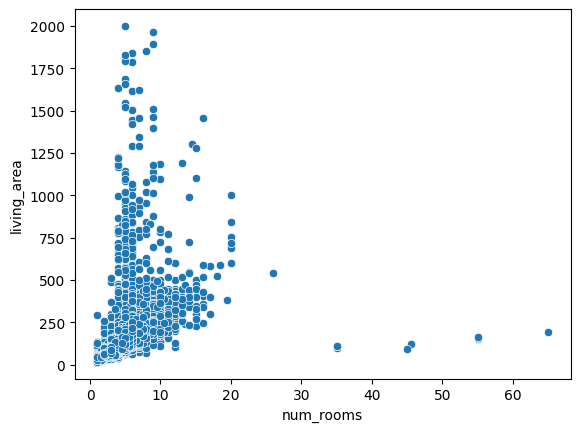

In [5]:
# show correlation between num_rooms and living_area
sns.scatterplot(data=filtered_train_data, x='num_rooms', y='living_area')


<Axes: xlabel='num_rooms', ylabel='living_area'>

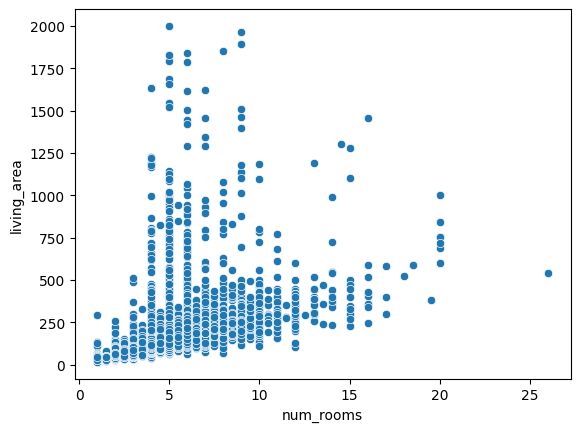

In [6]:
# correct rooms with possible missing comma
rooms_large_mask = filtered_train_data['num_rooms'] < 30
filtered_train_data = filtered_train_data[rooms_large_mask]
sns.scatterplot(data=filtered_train_data, x='num_rooms', y='living_area')

In [7]:
# Split data into features and labels.
X_data = filtered_train_data.drop(columns='price')
y_data = filtered_train_data['price']

In [8]:
# Split features and labels into train (X_train, y_train) and validation set (X_val, y_val).
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, stratify=X_data['object_type_name'], test_size=0.1)

# Data Analysis

We recommend you always start with data analysis, to understand the data better.

In [9]:
# TODO: Do your data analysis here
# print(X_train.head())
print(X_train.describe())


                lat          long       zipcode    build_year   living_area  \
count  18175.000000  18175.000000  18175.000000  18175.000000  18175.000000   
mean      47.115793      8.244142   5845.132435   1981.097717    154.626804   
std        0.431518      0.784846   2385.410808     48.044979    101.370541   
min       45.879650      5.992815   1000.000000   1513.000000     17.000000   
25%       46.871063      7.622107   4104.000000   1972.000000    108.000000   
50%       47.259113      8.275952   5722.000000   1992.000000    138.000000   
75%       47.441608      8.790541   8231.000000   2010.500000    176.000000   
max       47.793530     10.446271   9658.000000   2022.000000   1999.000000   

          num_rooms  water_percentage_1000  travel_time_private_transport  \
count  18175.000000           18175.000000                   18175.000000   
mean       4.969431               0.035854                      32.649904   
std        1.688645               0.081748               

# Define and train model

After the Data Analysis, we are ready to train a model.

We recommend starting with a very simple model. We can try more complex ones later.

Try for example a LinearRegression with only the two features "living_area" and "num_rooms".

After submitting the results of this simple model we can try more things. Like OneHotEncoding categorical features or other models.

Here is the link to the sklearn documentation and an example for the LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# living_area_num_rooms_train_df = X_train[['living_area', 'num_rooms']]
living_area_num_rooms_train_df = X_train[['living_area']]
# living_area_num_rooms_val_df = X_val[['living_area', 'num_rooms']]
living_area_num_rooms_val_df = X_val[['living_area']]

simple_model = LinearRegression()
simple_model.fit(living_area_num_rooms_train_df, y_train)



LinearRegression()

## Predict and evaluate prices for the validation set

After we have trained our model, we will evaluate it on the validation set.

We will use the MAPE metric (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error) for evaluation in this example project.
The MAPE metric is not available in the sklearn.metric package therefore we have implemented it ourselves here.

Note that if you will start your own project, defining which metric to use is an important step.
If you want to learn more about often used metrics that are available in sklearn: https://scikit-learn.org/stable/modules/model_evaluation.html

Note that MAPE is also defined in sklearn (since 2020): https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_percentage_error.html

In [21]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [22]:
# Note that in this skeleton we do not have a model. Therefore, we predict randomly.
# After you have defined and trained your model in the previous step, you should use it here to make the predictions.
y_val_pred = [np.mean(y_train)] * len(y_val)

After predicting for the validation set we can use the MAPE metric to see how good we are.

In [23]:
# How good are we on the validation data?
# The random predictions from our skeleton are of course quit bad.
print(mean_absolute_percentage_error(y_val, y_val_pred))

51.85240485422877


In [28]:
# validate model with mean_absolute_percentage_error
y_val_pred = simple_model.predict(living_area_num_rooms_val_df)
print(mean_absolute_percentage_error(y_val, y_val_pred))

44.373505650761395


# Predict prices for test set

If we are happy with the performance of our model on the validation set, we can apply it to the test set.

In [ ]:
# Load the test set
test_data = pd.read_csv('../data/houses_test.csv', index_col=0)

In [ ]:
# Split data into features and labels.
X_test = test_data.drop(columns='price')
y_test = test_data['price']

In [ ]:
# Note that in this skeleton we do not have a model. Therefore, we predict randomly.
# After you have defined and trained your model, you should use it here to make the predictions.
y_test_pred = [np.mean(y_train)] * len(X_test)

In [ ]:
# How good are we on the test data?
# The random predictions from our skeleton are of course quit bad.
print(mean_absolute_percentage_error(y_test, y_test_pred))

51.681573777767284


<Axes: xlabel='living_area', ylabel='price'>

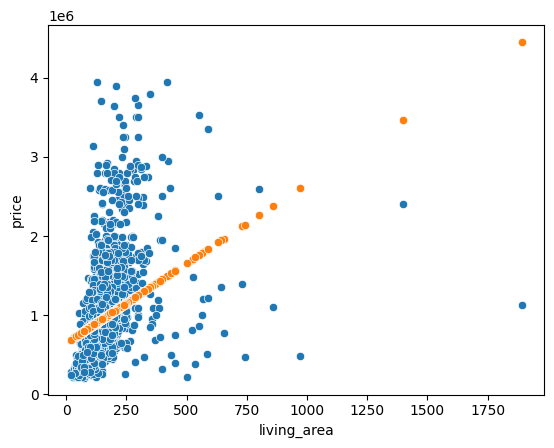

In [34]:
# plot regression model with sns
plt.close()

sns.scatterplot(data=X_val, x='living_area', y=y_val)
sns.scatterplot(data=X_val, x='living_area', y=y_val_pred)